# **CUSTOMER PERSONALITY ANALYSIS**

---

## **BACKGROUND**

Perusahaan retail memiliki fungsi untuk menyediakan kebutuhan masyarakat dengan menjual produk sesuai dengan kebutuhan dan minat konsumen. Salah satu faktor keberhasilan perusahaan retail yaitu dengan memiliki strategi yang tepat. 

Tim Retail Market/Project pada sebuah perusahaan retail membutuhkan insights dari Data Analyst, untuk menyusun strategi dengan menyesuaikan produk yang dijual dengan kebutuhan atau minat konsumen, sehingga dapat meningkatkan profit perusahaan.

Oleh karena itu, Data Analyst akan bekerja dengan maksimal untuk dapat memberikan jawaban atas setiap pernyataan masalah yang ada.

---

## **RESEARCH QUESTIONS**

Pada awal tahun 2015 ini, Tim Retail Market membutuhkan analisis dari data pelanggan tahun 2012-2014, untuk menyusun stategi pemasaran untuk setahun ke depan agar dapat meningkatkan profit perusahaan. Analisis yang diperlukan oleh Tim Retail Market yaitu:
- Bagaimana trend jumlah pelanggan yang mendaftar? karena Tim Retail Market merasa bahwa jumlah customer selama tiga bulan terakhir menurun, dan untuk mengetahui pastinya perlu melihat data yang ada.
- Bagaimana kepuasan pelanggan dengan produk, pelayanan dan fasilitas yang diberikan oleh perusahaan?
- Faktor karakteristik dan perilaku pelanggan apa saja yang berhubungan dengan jumlah pembelian produk, sehingga kita perlu mengetahui bagaimana karakteristik pelanggan dan perilaku pelanggan terlebih dahulu.

---

## **DATA**
Sehubungan dengan pernyataan masalah diatas, kita akan menganalisa data pelanggan yang sudah dikumpulkan oleh perusahaan. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)

Pada dataset ini, berisi informasi tentang karakteristik pelanggan **(People)**, jenis produk yang dibeli **(Products)**, jumlah pembelian berdasarkan promosi **(Promotion)**, jumlah pembelian berdasarkan tempat pembelian **(Place)**. Dataset ini berisi 29 kolom, yaitu:

### People
- ID : ID unik pelanggan
- Year_Birth : Tahun lahir pelanggan
- Education : Tingkat pendidikan pelanggan
- Marital_Status : Status pernikahan pelanggan
- Income : Pendapatan pelanggan
- Kidhome : Jumlah anak dalam rumah tangga pelanggan
- Teenhome : Jumlah remaja dalam rumah tangga pelanggan
- Dt_Customer : Tanggal pendaftaran pelanggan dengan perusahaan
- Recency : Jumlah hari sejak pembelian terakhir pelanggan
- Complain : 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 sebaliknya

#### Products
- MntWines : Jumlah yang dihabiskan untuk wine dalam 2 tahun terakhir
- MntFruits : Jumlah yang dihabiskan untuk buah dalam 2 tahun terakhir
- MntMeatProducts : Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
- MntFishProducts : Jumlah yang dihabiskan untuk ikan dalam 2 tahun terakhir
- MntSweetProducts : Jumlah yang dihabiskan untuk permen dalam 2 tahun terakhir
- MntGoldProds : Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir

#### Promotion
- NumDealsPurchases : Jumlah pembelian yang dilakukan dengan diskon
- AcceptedCmp1 : 1 jika pelanggan menerima promosi di campaign pertama, 0 jika tidak
- AcceptedCmp2 : 1 jika pelanggan menerima promosi di campaign kedua, 0 jika tidak
- AcceptedCmp3 : 1 jika pelanggan menerima promosi di campaign ketiga, 0 jika tidak
- AcceptedCmp4 : 1 jika pelanggan menerima promosi di campaign keempat, 0 jika tidak
- AcceptedCmp5 : 1 jika pelanggan menerima promosi di campaign kelima, 0 jika tidak
- Response : 1 jika pelanggan menerima promosi di campaign terakhir, 0 jika tidak

#### Place
- NumWebPurchases : Jumlah pembelian yang dilakukan melalui website perusahaan
- NumCatalogPurchases : Jumlah pembelian yang dilakukan menggunakan katalog
- NumStorePurchases : Jumlah pembelian dilakukan langsung di toko
- NumWebVisitsMonth : Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

Berikut dataset dari **marketing_campaign**:

In [95]:
df = pd.read_csv("marketing_campaign.csv", sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


---
## **DATA UNDERSTANDING AND CLEANING**

### **General Information**

Mengetahui informasi umum terkait dengan dataset

In [96]:
# Bentuk Dataframe df
df.shape

(2240, 29)

In [97]:
# Tipe data Dataframe df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [98]:
# Ringkasan deskriptive statistics pada kolom numerikal dan kolom kategorikal
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [99]:
pd.set_option('display.max_colwidth', -1)

# Data unique di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 12, 510, 3

Berdasarkan informasi umum diatas, dapat kita ketahui bahwa:
* Dataset marketing_campaign memiliki **29 kolom** dan **2240 baris**
* Data kosong (data NaN) hanya terdapat pada **kolom 'Income'**
* Kolom **'Z_CostContact'** dan **'Z_Revenue'** memiliki nilai yang sama, sehingga dapat didrop
* Kolom **'Dt_Customer'** memiliki tipe data object, yang sebaiknya diubah menjadi tipe data datetime

### **Missing Data**

Mengecek dan menangani missing value pada data

In [100]:
# Persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [101]:
# Mengisi missing values dengan median berdasarkan Education
df['Income']=df.groupby('Education')['Income'].apply(lambda x:x.fillna(x.median()))

In [102]:
# Persentase missing value di tiap kolom setelah missing values diisi
df.isna().sum()/df.shape[0]*100

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

Berdasarkan informasi diatas, terdapat missing values pada **kolom income sebanyak 1.07%**, kemudian missing values tersebut diisi dengan median berdasarkan education.

### **Drop Data**

Menghapus data yang tidak diperlukan

In [103]:
# Menghapus kolom 'Z_CostContact' dan 'Z_Revenue' karena memiliki nilai yang sama dan tidak diperlukan dapat proses analisis
df= df.drop(columns=['Z_CostContact', 'Z_Revenue'],axis=1)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


### **Duplicates**

Mengecek data duplikat

In [104]:
# Mengecek data duplikat
df.duplicated().unique()

array([False])

In [105]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response


Berdasarkan informasi diatas, diketahui bahwa tidak terdapat data yang duplikat

### **Formatted Data**

Mengubat tipe data 

In [106]:
# Mengubah type data pada kolom Dt_Customer menjadi datetime
df['Dt_Customer']= pd.to_datetime(df['Dt_Customer'])

### **Replace Data**

Membuat kategori baru dari data yang ada

In [107]:
# Education
df['Education'].value_counts()

Graduation    1127
PhD           486 
Master        370 
2n Cycle      203 
Basic         54  
Name: Education, dtype: int64

In [108]:
# Mengubah Variable Education dari 5 kategori menjadi 3 kategori, yaitu 'Undergraduate', 'Graduate', 'Postgraduate'
df['Education'] = df['Education'].replace({
    'Graduation':'Graduate',
    'PhD':'Postgraduate',
    'Master':'Postgraduate',
    '2n Cycle':'Postgraduate',
    'Basic':'Undergraduate'
})

df['Education'].value_counts()

Graduate         1127
Postgraduate     1059
Undergraduate    54  
Name: Education, dtype: int64

In [109]:
# Marital_Status
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow       77 
Alone       3  
Absurd      2  
YOLO        2  
Name: Marital_Status, dtype: int64

In [110]:
# Mengubah Variable Marital_Status menjadi 2 kategori, yaitu 'In Relationship', 'Single'
df['Marital_Status'] = df['Marital_Status'].replace({
    'Married':'In Relationship',
    'Together':'In Relationship',
    'Single':'Single',
    'Divorced':'Single',
    'Widow':'Single',
    'Alone':'Single',
    'Absurd':'Single',
    'YOLO':'Single',
})

df['Marital_Status'].value_counts()

In Relationship    1444
Single             796 
Name: Marital_Status, dtype: int64

### **Insert Columns**

Menambahkan kolom sesuai kebutuhan

In [111]:
# Membuat kolom 'Age'
# Menganggap data yang diterima pada tahun 2014, sehingga untuk menghitung usia pelanggan, maka cari selisih dari tahun 2014 dengan tahun lahir masing-masing pelanggan
df.insert(2,'Age', 2014 - df['Year_Birth'])

# Menghapus kolom 'Year_Birth' karena kolom tersebut sudah tidak diperlukan
df= df.drop(columns=['Year_Birth'], axis=1)

In [112]:
# Membuat kolom 'Age_Group' untuk melakukan klasifikasi Age ke dalam 4 kategori
df.loc[(df['Age'] >= 13) & (df['Age'] <= 19), 'Age_Group'] = 'Teen'
df.loc[(df['Age'] >= 20) & (df['Age']<= 39), 'Age_Group'] = 'Adult'
df.loc[(df['Age'] >= 40) & (df['Age'] <= 59), 'Age_Group'] = 'Middle Age Adult'
df.loc[(df['Age'] >= 60), 'Age_Group'] = 'Senior Adult'

cols = df.columns.tolist()
column_to_move = "Age_Group"
new_position = 2

cols.insert(new_position, cols.pop(cols.index(column_to_move)))
df = df[cols]

In [113]:
# Membuat kolom 'Dt_Cust_Month' dengan mengambil tahun dan bulan dari kolom 'Dt_Customer'
df.insert(9,'Dt_Cust_Month', df['Dt_Customer'].dt.to_period('M'))

In [114]:
df['Dt_Cust_Month'].value_counts().sort_index()

2012-01    16 
2012-02    9  
2012-03    21 
2012-04    17 
2012-05    17 
2012-06    14 
2012-07    23 
2012-08    91 
2012-09    67 
2012-10    81 
2012-11    62 
2012-12    76 
2013-01    96 
2013-02    113
2013-03    103
2013-04    96 
2013-05    93 
2013-06    95 
2013-07    94 
2013-08    104
2013-09    87 
2013-10    106
2013-11    100
2013-12    102
2014-01    79 
2014-02    65 
2014-03    78 
2014-04    71 
2014-05    82 
2014-06    61 
2014-07    24 
2014-08    16 
2014-09    12 
2014-10    22 
2014-11    23 
2014-12    24 
Freq: M, Name: Dt_Cust_Month, dtype: int64

In [115]:
# Membuat kolom 'Children' dengan menggabungkan kolom 'Kidhome' dan 'Teenhome'
df.insert(6,'Children', df['Kidhome'] + df['Teenhome'])

# Menghapus kolom 'Kidhome' dan 'Teenhome'
df= df.drop(columns=['Kidhome', 'Teenhome'], axis=1)

df

,ID,Age,Age_Group,Education,Marital_Status,Income,Children,Dt_Customer,Dt_Cust_Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,57,Middle Age Adult,Graduate,Single,58138.0,0,2012-04-09,2012-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,60,Senior Adult,Graduate,Single,46344.0,2,2014-08-03,2014-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,49,Middle Age Adult,Graduate,In Relationship,71613.0,0,2013-08-21,2013-08,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,30,Adult,Graduate,In Relationship,26646.0,1,2014-10-02,2014-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,33,Adult,Postgraduate,In Relationship,58293.0,1,2014-01-19,2014-01,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Middle Age Adult,Graduate,In Relationship,61223.0,1,2013-06-13,2013-06,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,68,Senior Adult,Postgraduate,In Relationship,64014.0,3,2014-10-06,2014-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,33,Adult,Graduate,Single,56981.0,0,2014-01-25,2014-01,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,58,Middle Age Adult,Postgraduate,In Relationship,69245.0,1,2014-01-24,2014-01,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [116]:
# Membuat Kolom Total_Products
total_products = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

df.insert(17,'Total_Products', total_products)

In [117]:
# Membuat Kolom Total_Purchases
total_purchases = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

df.insert(21,'Total_Purchases', total_purchases)

In [118]:
# Membuat Kolom Total_Accepted_Campaign
total_accepted_campaign = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['Response']

df.insert(28,'Total_Accepted_Campaign', total_accepted_campaign)

### **Move Columns**
Memindahkan kolom agar lebih mudah dilihat secara berurutan

In [119]:
cols = df.columns.tolist()
column_to_move = "NumDealsPurchases"
new_position = 21

cols.insert(new_position, cols.pop(cols.index(column_to_move)))
df = df[cols]

In [120]:
cols = df.columns.tolist()
column_to_move = "Response"
new_position = 28

cols.insert(new_position, cols.pop(cols.index(column_to_move)))
df = df[cols]

In [121]:
cols = df.columns.tolist()
column_to_move = "AcceptedCmp1"
new_position = 23

cols.insert(new_position, cols.pop(cols.index(column_to_move)))
df = df[cols]

In [122]:
cols = df.columns.tolist()
column_to_move = "AcceptedCmp2"
new_position = 24

cols.insert(new_position, cols.pop(cols.index(column_to_move)))
df = df[cols]

### **Check Data**
Melakukan cek ulang data

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       2240 non-null   int64         
 1   Age                      2240 non-null   int64         
 2   Age_Group                2240 non-null   object        
 3   Education                2240 non-null   object        
 4   Marital_Status           2240 non-null   object        
 5   Income                   2240 non-null   float64       
 6   Children                 2240 non-null   int64         
 7   Dt_Customer              2240 non-null   datetime64[ns]
 8   Dt_Cust_Month            2240 non-null   period[M]     
 9   Recency                  2240 non-null   int64         
 10  MntWines                 2240 non-null   int64         
 11  MntFruits                2240 non-null   int64         
 12  MntMeatProducts          2240 non-

- Sudah tidak terdapat missing values
- Tipe data sudah sesuai
- Data yang diperlukan sudah lengkap

In [124]:
# Terdapat Total_Purchases yang bernilai 0, padahal Total_Products tersebut tidak 0
df[df['Total_Purchases']==0][['ID','Total_Products','Total_Purchases']]

,ID,Total_Products,Total_Purchases
655,5555,6,0
981,3955,6,0
1245,6862,8,0
1524,11110,5,0
1846,9931,9,0
2132,11181,8,0


In [125]:
# Karena data Total_Products dan Total_Purchases diatas tidak vaid, maka dihapus
df=df.drop(index=[655,981,1245,1524,1846,2132])

### **Outliers Data**

Mengecek data yang outlier

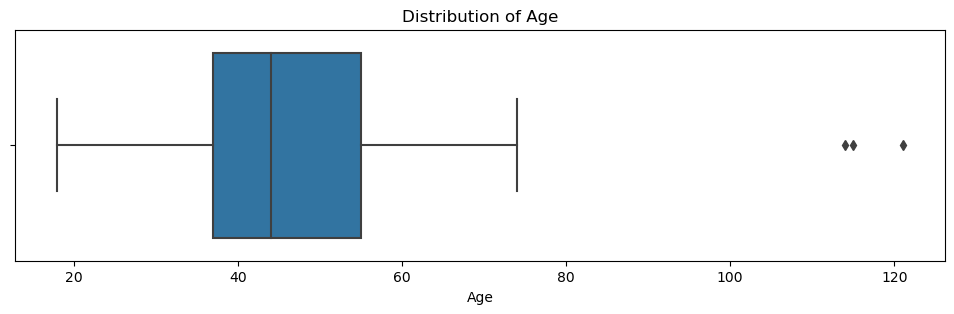

In [126]:
# Age
plt.figure(figsize=(12,3))
sns.boxplot(data=df, x='Age')
plt.title('Distribution of Age');

In [127]:
df[df['Age']> 80]

,ID,Age,Age_Group,Education,Marital_Status,Income,Children,Dt_Customer,Dt_Cust_Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Products,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total_Accepted_Campaign,Complain
192,7829,114,Senior Adult,Postgraduate,Single,36640.0,1,2013-09-26,2013-09,99,15,6,8,7,4,25,65,2,1,2,5,1,5,0,0,0,0,0,0,0,1
239,11004,121,Senior Adult,Postgraduate,Single,60182.0,1,2014-05-17,2014-05,23,8,0,5,7,0,2,22,1,0,2,3,1,4,0,0,0,0,0,0,0,0
339,1150,115,Senior Adult,Postgraduate,In Relationship,83532.0,0,2013-09-26,2013-09,36,755,144,562,104,64,224,1853,4,6,4,14,1,1,0,0,0,0,1,0,0,0


- Terdapat 3 data yang outliers pada kolom 'Age', yaitu usia 114, 121, dan 115 tahun
- Hanya sedikit kemungkinan orang berusia diatas 100 tahun
- Data tersebut tidak terlalu berpengaruh, jika analisis usia dilakukan menggunakan kolom 'Age_Group' atau klasifikasi dari kolom 'Age'
- Sehingga data tersebut tidak perlu dihapus

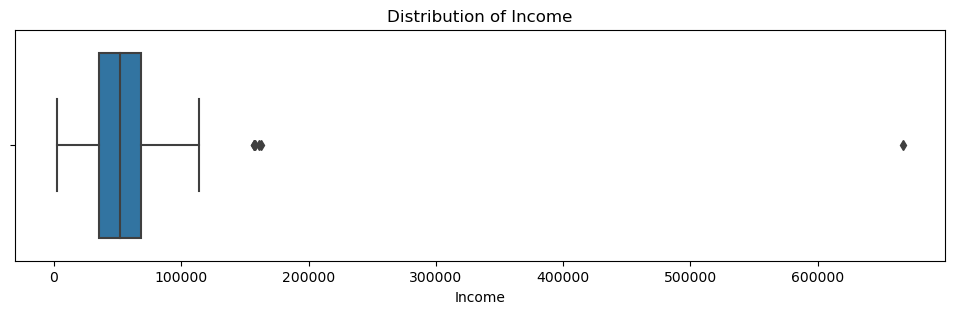

In [128]:
# Income  
plt.figure(figsize=(12,3))
sns.boxplot(data=df, x='Income')
plt.title('Distribution of Income');

In [129]:
df[df['Income']> 100000]

,ID,Age,Age_Group,Education,Marital_Status,Income,Children,Dt_Customer,Dt_Cust_Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Products,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total_Accepted_Campaign,Complain
124,7215,31,Adult,Graduate,Single,101970.0,0,2013-12-03,2013-12,69,722,27,102,44,72,168,1135,6,8,13,27,0,2,1,0,0,1,1,1,3,0
164,8475,41,Middle Age Adult,Postgraduate,In Relationship,157243.0,1,2014-01-03,2014-01,98,20,2,1582,1,2,1,1608,0,22,0,22,15,0,0,0,0,0,0,0,0,0
203,2798,37,Adult,Postgraduate,In Relationship,102160.0,0,2012-02-11,2012-02,54,763,29,138,76,176,58,1240,7,9,10,26,0,4,1,0,0,1,1,1,3,0
252,10089,40,Middle Age Adult,Graduate,Single,102692.0,0,2013-05-04,2013-05,5,168,148,444,32,172,148,1112,6,9,13,28,1,2,1,1,0,1,1,1,4,0
617,1503,38,Adult,Postgraduate,In Relationship,162397.0,2,2013-03-06,2013-03,31,85,1,16,2,1,2,107,0,0,1,1,0,1,0,0,0,0,0,0,0,0
646,4611,44,Middle Age Adult,Graduate,In Relationship,105471.0,0,2013-01-21,2013-01,36,1009,181,104,202,21,207,1724,9,8,13,30,0,3,1,0,0,0,1,1,2,0
687,1501,32,Adult,Postgraduate,In Relationship,160803.0,0,2012-04-08,2012-04,21,55,16,1622,17,3,4,1717,0,28,1,29,15,0,0,0,0,0,0,0,0,0
1300,5336,43,Middle Age Adult,Postgraduate,In Relationship,157733.0,1,2013-04-06,2013-04,37,39,1,9,2,0,8,59,1,0,1,2,0,1,0,0,0,0,0,0,0,0
1653,4931,37,Adult,Graduate,In Relationship,157146.0,0,2013-04-29,2013-04,13,1,0,1725,2,1,1,1730,0,28,0,28,0,1,0,0,0,0,0,0,0,0
1898,4619,69,Senior Adult,Postgraduate,Single,113734.0,0,2014-05-28,2014-05,9,6,2,3,1,262,3,277,27,0,0,27,0,1,0,0,0,0,0,0,0,0


- Terdapat 13 data yang outliers pada kolom 'Income'

### **Save Data**

Menyimpan data yang sudah bersih

In [130]:
df.to_csv ('CPA_data.csv', index=False)

---
## **DATA ANALYSIS**

Setelah tahap data cleaning, maka data siap untuk dianalisis. Berikut tabel yang sudah bersih:

In [131]:
df.head()

,ID,Age,Age_Group,Education,Marital_Status,Income,Children,Dt_Customer,Dt_Cust_Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Products,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total_Accepted_Campaign,Complain
0,5524,57,Middle Age Adult,Graduate,Single,58138.0,0,2012-04-09,2012-04,58,635,88,546,172,88,88,1617,8,10,4,22,3,7,0,0,0,0,0,1,1,0
1,2174,60,Senior Adult,Graduate,Single,46344.0,2,2014-08-03,2014-08,38,11,1,6,2,1,6,27,1,1,2,4,2,5,0,0,0,0,0,0,0,0
2,4141,49,Middle Age Adult,Graduate,In Relationship,71613.0,0,2013-08-21,2013-08,26,426,49,127,111,21,42,776,8,2,10,20,1,4,0,0,0,0,0,0,0,0
3,6182,30,Adult,Graduate,In Relationship,26646.0,1,2014-10-02,2014-10,26,11,4,20,10,3,5,53,2,0,4,6,2,6,0,0,0,0,0,0,0,0
4,5324,33,Adult,Postgraduate,In Relationship,58293.0,1,2014-01-19,2014-01,94,173,43,118,46,27,15,422,5,3,6,14,5,5,0,0,0,0,0,0,0,0


### **Trend of Customer Registration**

Mengetahui jumlah pelanggan yang mendaftar ke perusahaan setiap bulannya

In [132]:
# Membuat DataFrame
# Untuk mengetahui bulan dan jumlah pelanggan
cus_regis = df['Dt_Cust_Month'].value_counts().sort_index()
df_cus_regis = pd.DataFrame(list(cus_regis.items()), columns=['Year_Month', 'Count'])
df_cus_regis

,Year_Month,Count
0,2012-01,16
1,2012-02,9
2,2012-03,21
3,2012-04,17
4,2012-05,17
5,2012-06,14
6,2012-07,23
7,2012-08,91
8,2012-09,67
9,2012-10,81


In [133]:
# Melihat jumlah pelanggan yang mendaftar pada tahun 2013
df_cus_regis['Count'].iloc[12:24].sum()

1187

In [134]:
# Melihat persentase pelanggan yang mendaftar pada tahun 2013
df_cus_regis['Count'].iloc[12:24].sum()/len(df)*100

53.133393017009844

In [135]:
# Melihat rata-rata jumlah pelanggan yang mendaftar setiap bulannya
df_cus_regis['Count'].mean()

62.05555555555556

In [136]:
# Melihat persentase peningkatan pelanggan yang mendaftar pada bulan Agustus 2012
(91-23)/len(df)*100

3.043867502238138

In [137]:
# Melihat persentase penurunan pelanggan yang mendaftar pada bulan Juli 2014
(23-59)/len(df)*100

-1.611459265890779

In [138]:
# Mengubah tipe data datetime menjadi string agar dapat membuat lineplot
df_cus_regis['Year_Month'] = df_cus_regis['Year_Month'].astype(str)

''

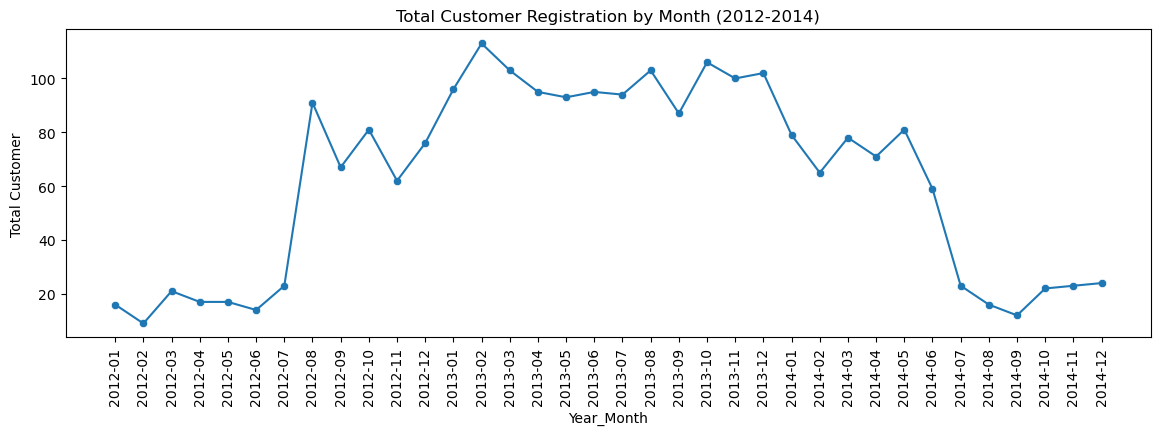

In [139]:
# Membuat lineplot
plt.figure(figsize=(14,4))

sns.lineplot(
    data=df_cus_regis,
    x='Year_Month',
    y='Count', 
    )

plt.xlabel('Year_Month')
plt.ylabel('Total Customer')
plt.title('Total Customer Registration by Month (2012-2014)')

plt.xticks(
    rotation=90
    )

sns.scatterplot(
    data=df_cus_regis,
    x='Year_Month',
    y='Count', 
    )
;

Berdasarkan grafik diatas, diketahui bahwa:
- Jumlah pelanggan yang mendaftar setiap bulannya tidak stabil
- Pada tahun 2013, jumlah pelanggan yang mendaftar lebih banyak dibandingkan tahun 2012 dan 2014 yaitu sebanyak 53.13% (1187 pelanggan)
- Rata-rata jumlah pelanggan yang mendaftar setiap bulannya pada tahun 2012-2014 sebesar 62 pelanggan
- Jumlah pelanggan yang mendaftar mengalami peningkatan secara signifikan sebesar 295% (68 pelanggan) yaitu pada bulan Agustus 2012
- Jumlah pelanggan yang mendaftar mengalami penurunan secara signifikan sebesar 61% (36 pelanggan) yaitu pada bulan Juli 2014
- Jumlah pelanggan yang mendaftar paling banyak pada bulan Februari 2013 yaitu sebanyak 113 pelanggan
- Jumlah pelanggan yang mendaftar paling sedikit pada bulan Februari 2012 yaitu sebanyak 9 pelanggan

### **Customer Satisfaction**

Mengetahui tingkat kepuasan pelanggan

In [140]:
# Melihat jumlah pelanggan yang pernah melakukan complain
df['Complain'].value_counts()

0    2213
1    21  
Name: Complain, dtype: int64

In [141]:
# Melihat persentase pelanggan yang pernah menyampaikan keluhan (complain) dalam 2 tahun terakhir
21/len(df)*100

0.9400179051029544

Text(0.5, 1.0, 'Number of Complain')

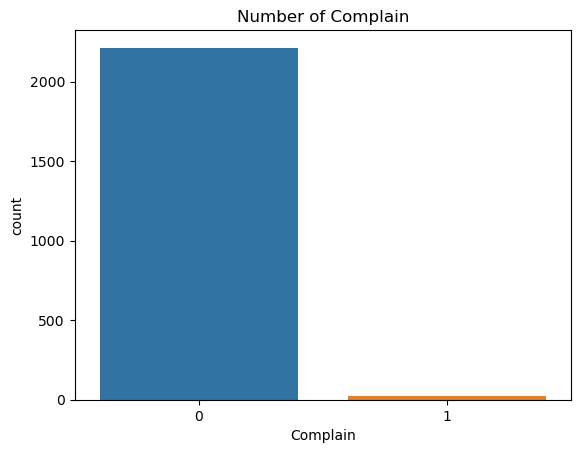

In [142]:
# Countplot untuk membandingkan 
sns.countplot(data=df, x='Complain')
plt.title('Number of Complain')

Berdasarkan dari informasi di atas, diketahui bahwa dari 2234 pelanggan, hanya terdapat **0.94% (21 pelanggan)** menyampaikan keluhan (complain) dalam 2 tahun terakhir. Sehingga dapat disimpulkan bahwa pelanggan puas dengan produk, pelayanan atau fasilitas dari store ini. 

Meskipun tingkat kepuasan pelanggan sudah baik, namun tim retail market tetap perlu mengatur strategi agar perusahaan mendapatkan profit lebih.

### **Customer Characteristics**

Mengetahui jumlah pelanggan berdasarkan karakteristik yang ada (Age_Group, Education, Marital_Status, Children, Income):

In [143]:
# Menmbuat kolom baru untuk melihat kategori dari jumlah anak
df.loc[(df['Children'] == 0 ), 'Total_Children'] = 'Childless'
df.loc[(df['Children'] == 1 ), 'Total_Children'] = 'One'
df.loc[(df['Children'] == 2 ), 'Total_Children'] = 'Two'
df.loc[(df['Children'] == 3 ), 'Total_Children'] = 'Three'

cols = df.columns.tolist()
column_to_move = 'Total_Children'
new_position = 7

cols.insert(new_position, cols.pop(cols.index(column_to_move)))
df = df[cols]

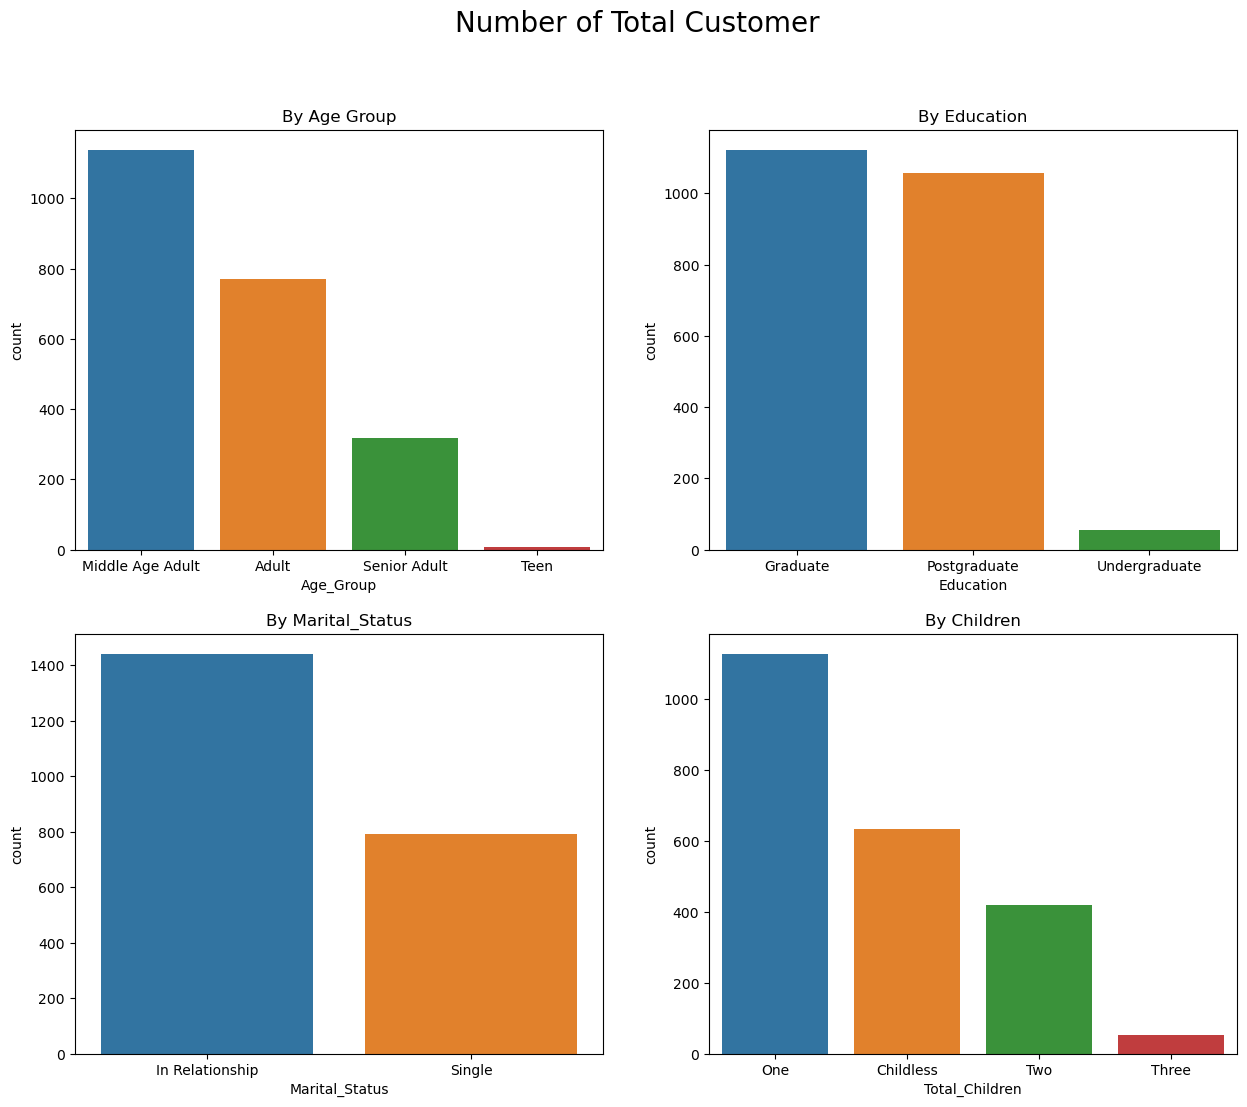

In [186]:
plt.figure(figsize=(15,12))

# Count plot Number of Customer by Age Group
plt.subplot(2,2,1)
sns.countplot(data=df, x='Age_Group', order=df['Age_Group'].value_counts().index)
plt.title('By Age Group')

# Count plot Number of Customer by Education
plt.subplot(2,2,2)
ax= sns.countplot(data=df, x='Education', order=df['Education'].value_counts().index)
ax= plt.title('By Education')

# Count plot Number of Customer by Marital_Status
plt.subplot(2,2,3)
sns.countplot(data=df, x='Marital_Status', order=df['Marital_Status'].value_counts().index)
plt.title('By Marital_Status')

# Count plot Number of Customer by Children
plt.subplot(2,2,4)
sns.countplot(data=df, x='Total_Children', order=df['Total_Children'].value_counts().index)
plt.title('By Children')

plt.suptitle('Number of Total Customer', size=20)

plt.show()

Text(0, 0.5, 'Count')

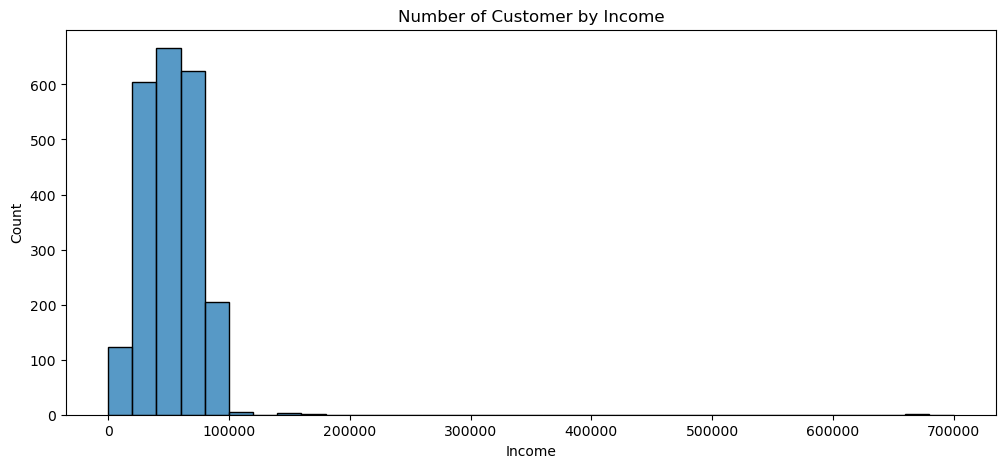

In [145]:
# Histogram Income
plt.figure(figsize=(12,5))
sns.histplot(data=df, x='Income', binrange=(0,700000), binwidth= 20000)
plt.title('Number of Customer by Income')
plt.ylabel('Count')

In [146]:
# Melihat jumlah pelanggan berdasarkan Age_Group
df['Age_Group'].value_counts()

Middle Age Adult    1139
Adult               770 
Senior Adult        318 
Teen                7   
Name: Age_Group, dtype: int64

In [147]:
# Melihat persentase pelanggan yang tergolong ke dalam Middle Age Adult
1139/len(df)*100

50.9847806624888

In [148]:
# Melihat jumlah pelanggan berdasarkan Education
df['Education'].value_counts()

Graduate         1123
Postgraduate     1057
Undergraduate    54  
Name: Education, dtype: int64

In [149]:
# Melihat persentase pelanggan yang latar belakang pendidikan 'Graduate'
1123/len(df)*100

50.268576544315124

In [150]:
# Melihat jumlah pelanggan berdasarkan Marital_Status
df['Marital_Status'].value_counts()

In Relationship    1442
Single             792 
Name: Marital_Status, dtype: int64

In [151]:
# Melihat persentase pelanggan yang status pernikahannya 'In Relationship'
1442/len(df)*100

64.54789615040286

In [152]:
# Melihat jumlah pelanggan berdasarkan Jumlah Anak
df['Children'].value_counts()

1    1127
0    634 
2    420 
3    53  
Name: Children, dtype: int64

In [153]:
# Melihat persentase pelanggan yang memiliki jumlah anak sebanyak 1 orang
1127/len(df)*100

50.44762757385855

In [154]:
# Melihat jumlah pelanggan yang memiliki penghasilan 40000-59999
len(df[df['Income'].between(40000,59999)])

666

In [155]:
# Melihat persentase pelanggan yang memiliki penghasilan 40000-59999
666/len(df)*100

29.811996418979408

Berdasarkan informasi di atas, diketahui bahwa mayoritas pelanggan memiliki karakteristik:
- Berasal dari kelompok usia **Middle Age Adult** (Usia 40-59 tahun) yaitu sebanyak 1139 pelanggan (50.9%)
- Memiliki latar belakang pendidikan **Graduate** (Lulus Sarjana) yaitu sebanyak 1123 pelanggan (50.3%)
- Status pernikahan **In Relationship** (Miliki pasangan) yaitu sebanyak 1442 pelanggan (64.5%)
- Memiliki jumlah anak **1 anak**, yaitu sebanyak 1127 pelanggan (50.4%)
- Memiliki pendapatan sebesar **40.000-59.999** dollar, yaitu sebanyak 666 pelanggan (29.91%)

### **Customer Behavior**

Mengetahui perilaku pelanggan (jenis produk yang diminati, tempat pembelian, penerimaan promosi), sehingga dapat mengatur strategi yang tepat.

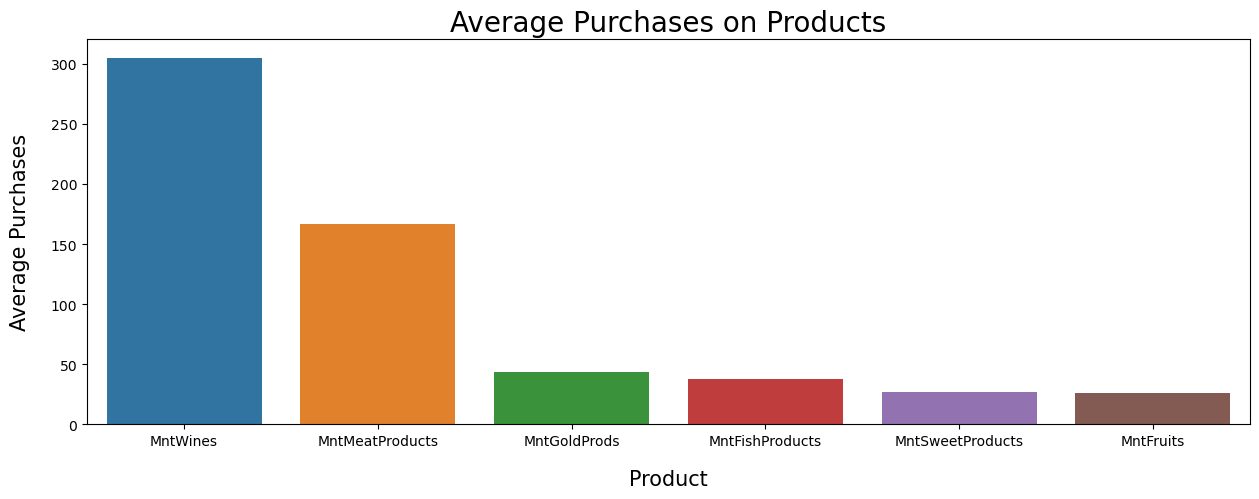

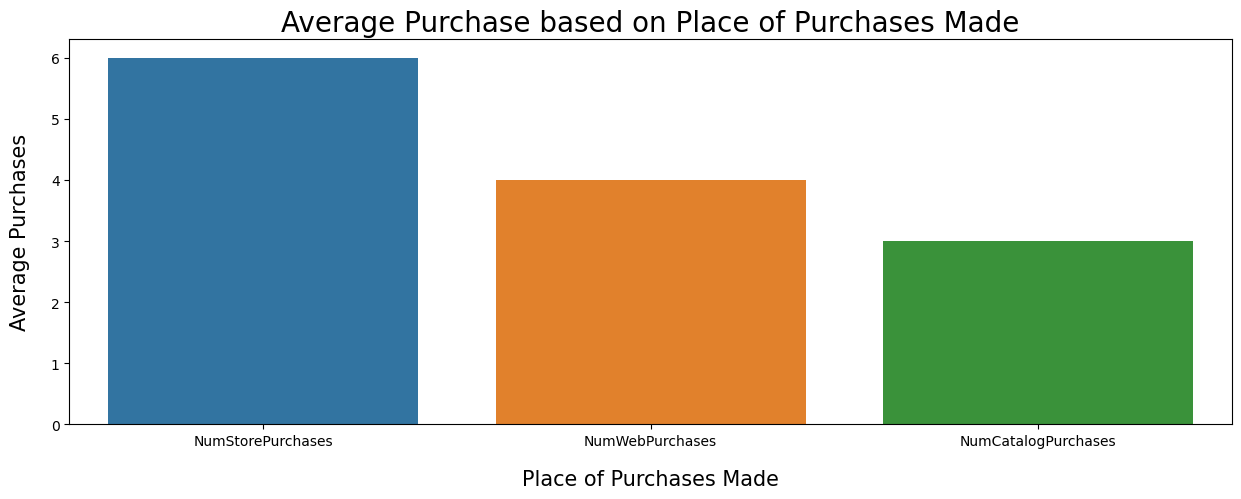

In [156]:
# Bar plot Average Purchases on Products
# Untuk mengetahui rata-rata perilaku pelanggan dalam membeli produk berdasarkan jenis produk
products = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
products_means = products.mean(axis=0).sort_values(ascending=False).round(0)
products_means_df = pd.DataFrame(list(products_means.items()), columns=['Product', 'Average Purchases'])

plt.figure(figsize=(15,5))
plt.title('Average Purchases on Products', size=20)
sns.barplot(data=products_means_df, x='Product', y='Average Purchases');
plt.xlabel('Product', fontsize=15, labelpad=15)
plt.ylabel('Average Purchases', fontsize=15, labelpad=15);

# Bar plot Average Purchases based on Place of Purchases Made
# Untuk mengetahui rata-rata perilaku pelanggan dalam membeli produk berdasarkan tempat pembelian yang dilakukan (store/web/catalog)
purchases = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']]
purchases_means = purchases.mean(axis=0).sort_values(ascending=False).round(0)
purchases_means_df = pd.DataFrame(list(purchases_means.items()), columns=['Place of Purchases Made', 'Average Purchases'])

plt.figure(figsize=(15,5))
plt.title('Average Purchase based on Place of Purchases Made', size=20)
sns.barplot(data=purchases_means_df, x='Place of Purchases Made', y='Average Purchases');
plt.xlabel('Place of Purchases Made', fontsize=15, labelpad=15)
plt.ylabel('Average Purchases', fontsize=15, labelpad=15);


In [157]:
# DataFrame dari rata-rata perilaku pelanggan dalam membeli produk berdasarkan jenis produk
df_product = pd.DataFrame(list(products_means.items()), columns=['Product', 'Average Purchases'])
df_product

,Product,Average Purchases
0,MntWines,305.0
1,MntMeatProducts,167.0
2,MntGoldProds,44.0
3,MntFishProducts,38.0
4,MntSweetProducts,27.0
5,MntFruits,26.0


In [158]:
# Melihat total dari rata-rata seluruh pembelian produk
df_product['Average Purchases'].sum()

607.0

In [159]:
# Melihat persentase produk wine  
305/df_product['Average Purchases'].sum()*100

50.24711696869851

In [160]:
# DataFrame dari rata-rata perilaku pelanggan dalam membeli produk berdasarkan tempat pembelian yang dilakukan (store/web/catalog)
df_purchases = pd.DataFrame(list(purchases_means.items()), columns=['Place of Purchases Made', 'Average Purchases'])
df_purchases

,Place of Purchases Made,Average Purchases
0,NumStorePurchases,6.0
1,NumWebPurchases,4.0
2,NumCatalogPurchases,3.0


In [161]:
# Melihat total dari rata-rata seluruh pembelian berdasarkan tempat 
df_purchases['Average Purchases'].sum()

13.0

In [162]:
# Melihat persentase pembelian yang dilakukan di store
6/df_purchases['Average Purchases'].sum()*100

46.15384615384615

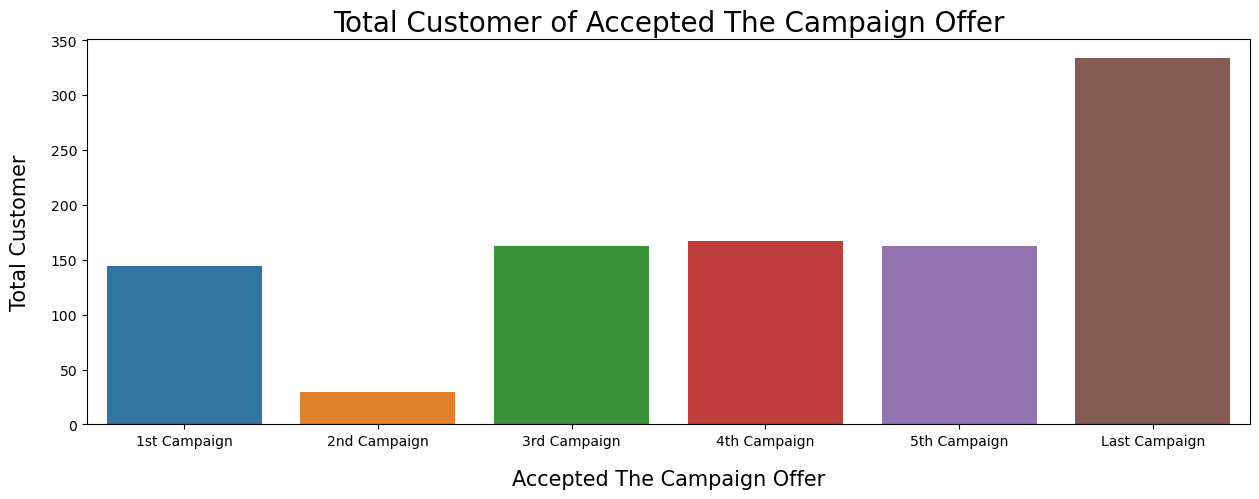

In [163]:
# Bar plot Total Customer of Accepted Campaign
# Untuk mengetahui persentase pelanggan yang pernah menerima penawaran promosi 

# Persentase Pelanggan yang menerima promosi di campaign pertama
pertama = df[df['AcceptedCmp1']==1]['AcceptedCmp1'].count()

# Persentase Pelanggan yang menerima promosi di campaign kedua
kedua = df[df['AcceptedCmp2']==1]['AcceptedCmp2'].count()

# Persentase Pelanggan yang menerima promosi di campaign ketiga
ketiga = df[df['AcceptedCmp3']==1]['AcceptedCmp3'].count()

# Persentase Pelanggan yang menerima promosi di campaign keempat
keempat = df[df['AcceptedCmp4']==1]['AcceptedCmp4'].count()

# Persentase Pelanggan yang menerima promosi di campaign kelima
kelima = df[df['AcceptedCmp5']==1]['AcceptedCmp5'].count()

# Persentase Pelanggan yang menerima promosi di campaign terakhir
keenam = df[df['Response']==1]['Response'].count()


# Membuat DataFrame 
df_campaign = pd.DataFrame({
    'Accepted The Campaign Offer': ('1st Campaign', '2nd Campaign', '3rd Campaign', '4th Campaign','5th Campaign', 'Last Campaign'),
    'Total Customer': (pertama, kedua, ketiga, keempat, kelima, keenam),
}).round(1)


# Membuat Bar plot
plt.figure(figsize=(15,5))
plt.title('Total Customer of Accepted The Campaign Offer', size=20)
sns.barplot(data=df_campaign, x='Accepted The Campaign Offer', y='Total Customer');
plt.xlabel('Accepted The Campaign Offer', fontsize=15, labelpad=15)
plt.ylabel('Total Customer', fontsize=15, labelpad=15);


In [164]:
# DataFrame total pelanggan yang pernah menerima penawaran promosi
pd.DataFrame({
    'Accepted The Campaign Offer': ('1st Campaign', '2nd Campaign', '3rd Campaign', '4th Campaign','5th Campaign', 'Last Campaign'),
    'Total Customer': (pertama, kedua, ketiga, keempat, kelima, keenam),
}).round(1)

,Accepted The Campaign Offer,Total Customer
0,1st Campaign,144
1,2nd Campaign,30
2,3rd Campaign,163
3,4th Campaign,167
4,5th Campaign,163
5,Last Campaign,334


In [165]:
df[(df['AcceptedCmp5']==1)&(df['Dt_Cust_Month']=='2012-01')]

# Melihat data pelanggan yang mendaftar pada bulan Januari 2012 dan menerima promosi pada campaign kelima

,ID,Age,Age_Group,Education,Marital_Status,Income,Children,Total_Children,Dt_Customer,Dt_Cust_Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Products,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total_Accepted_Campaign,Complain
945,3202,27,Adult,Postgraduate,In Relationship,51563.0,0,Childless,2012-01-10,2012-01,60,1166,0,48,0,0,36,1250,4,4,10,18,1,8,0,0,0,1,1,0,1,0
976,2611,55,Middle Age Adult,Postgraduate,In Relationship,82576.0,0,Childless,2012-01-08,2012-01,66,1206,55,445,168,18,18,1910,2,4,12,18,1,1,0,0,0,0,1,0,0,0
1473,4070,45,Middle Age Adult,Postgraduate,In Relationship,94871.0,2,Two,2012-01-09,2012-01,99,169,24,553,188,0,144,1078,8,5,4,17,1,7,0,0,0,1,1,1,2,0


In [166]:
df[(df['AcceptedCmp1']==1)&(df['Dt_Cust_Month']=='2014-12')]

# Melihat data pelanggan yang mendaftar pada bulan Februari 2012 dan menerima promosi pada campaign pertama

,ID,Age,Age_Group,Education,Marital_Status,Income,Children,Total_Children,Dt_Customer,Dt_Cust_Month,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Products,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Total_Purchases,NumDealsPurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Total_Accepted_Campaign,Complain
1458,10133,44,Middle Age Adult,Graduate,Single,93790.0,0,Childless,2014-12-02,2014-12,16,1302,68,731,89,114,45,2349,6,7,12,25,0,2,1,0,0,1,1,1,3,0
1982,3334,63,Senior Adult,Graduate,In Relationship,94642.0,0,Childless,2014-12-02,2014-12,35,879,143,797,106,143,143,2211,5,7,9,21,0,1,1,0,0,0,1,0,1,0


Berdasarkan dari informasi di atas, diketahui bahwa perilaku pelanggan sebagai berikut:
- Rata-rata setiap pelanggan membeli 607 produk dan paling banyak membeli produk **wine sebanyak 305 (50.25%)**, kemudian daging sebanyak 167 (27.51%), dan paling sedikit **buah sebanyak 26 (4.28%)**.
- Rata-rata setiap pelanggan melakukan 13 kali pembelian dan paling banyak melalui **store sebanyak 6 kali (13%)**, dan paling sedikit melakukan pembelian melalui **catalog sebanyak 3 kali (23%)**
- Pelanggan paling banyak menerima promosi di **campaign terakhir yaitu sebanyak 334 pelanggan**

### **Relationship between Features with Total Products**

Mengetahui hubungan antara Features (yang numerik) dengan Total Produk yang dibeli dengan Heatmap:

In [167]:
# Melihat correlation dengan mengabaikan outliers pada income (Income < 100000)
df_income = df[df['Income']< 100000]

In [168]:
# Tabel Correlation
df_income = df[df['Income']<100000]
df_corr = (df_income.corr()[['Total_Products']]).iloc[[1,2,3,12,13,14,-2,-1]]
df_corr

,Total_Products
Age,0.115550
Income,0.823326
Children,-0.500683
NumWebPurchases,0.532204
NumCatalogPurchases,0.795485
NumStorePurchases,0.679506
Total_Accepted_Campaign,0.383333
Complain,-0.037225


Text(0.5, 1.0, 'Relationship between Features \nwith Total Products')

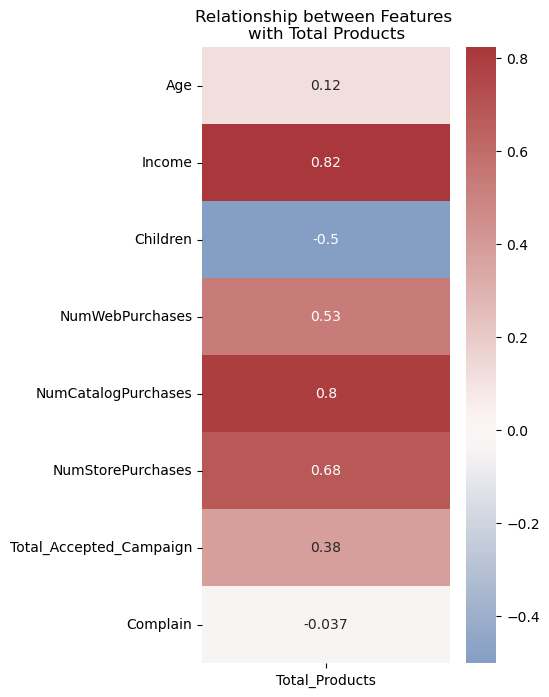

In [169]:
# Heatmap Feature vs Total Products
plt.figure(figsize=(4,8))
sns.heatmap(data=(df_income.corr()[['Total_Products']]).iloc[[1,2,3,12,13,14,-2,-1]], annot=True, cmap='vlag', center=0)
plt.title(f'''Relationship between Features 
with Total Products''')

Berdasarkan dari informasi di atas, diketahui bahwa faktor yang memiliki hubungan yang kuat positif dengan total produk yang dibeli (Total_Products) adalah 
- Faktor pendapatan (Income)
- Jumlah pembelian yang dilakukan melalui catalog (NumStorePurchases)
- Jumlah pembelian yang dilakukan melalui store (NumStorePurchases)

Artinya:
- Semakin tinggi pendapatan, maka jumlah produk yang dibeli oleh pelanggan akan semakin tinggi
- Semakin banyak pembelian yang dilakukan melalui catalog, maka jumlah produk yang dibeli oleh pelanggan akan semakin tinggi
- Semakin banyak pembelian yang dilakukan melalui store, maka jumlah produk yang dibeli oleh pelanggan akan semakin tinggi

Melihat Hubungan Income dengan Total_Products berdasarkan Education dan Marital Status dengan Scatterplot:

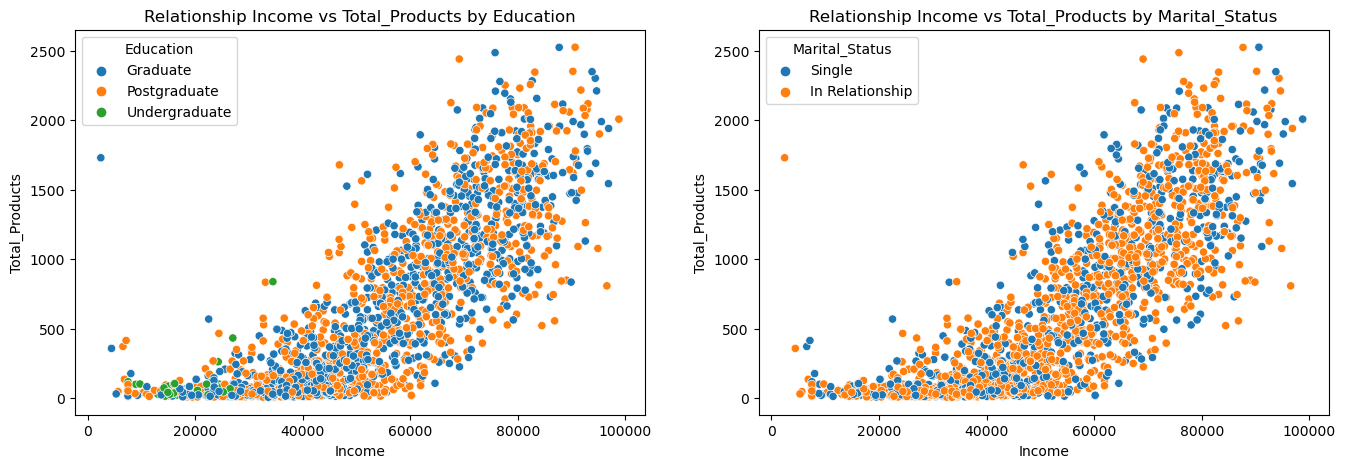

In [170]:
# Scatterplot
plt.figure(figsize=(25,5))

# Scatterplot untuk melihat hubungan Income dengan Total_Products berdasarkan Education
plt.subplot(1,3,2)
sns.scatterplot(data=df_income, x='Income', y='Total_Products', hue='Education')
plt.title('Relationship Income vs Total_Products by Education');

# Scatterplot untuk melihat hubungan Income dengan Total_Products berdasarkan Marital_Status
plt.subplot(1,3,3)
sns.scatterplot(data=df_income, x='Income', y='Total_Products', hue='Marital_Status')
plt.title('Relationship Income vs Total_Products by Marital_Status');

Berdasarkan dari informasi di atas, diketahui bahwa:
- Hubungan antara penghasilan (Income) pelanggan yang berpendidikan sarjana (Graduate) dan pelanggan yang berpendidikan S2 (Post Graduate) tidak berbeda signifikan dengan jumlah produk yang dibeli. Range Income dan Total Produk dari pelanggan yang berpendidikan Graduate dan Undergraduate cukup luas dan tersebar.
Namun berbeda dengan Income dan Total Produk dari pelanggan yang berpendidikan Under Graduate. Pelanggan yang berpendidikan Under Graduate memiliki income tidak lebih dari 40000 dollar dan total produk dibawah 1000 
- Hubungan antara penghasilan (Income) pelanggan yang tidak berpasangan (Single) dan pelanggan yang berpasangan (In Relationship) tidak berbeda signifikan dengan jumlah produk yang dibeli.

Melihat Rata-rata Total_Products berdasarkan Education menggunakan Barplot:

<Figure size 5000x5000 with 0 Axes>

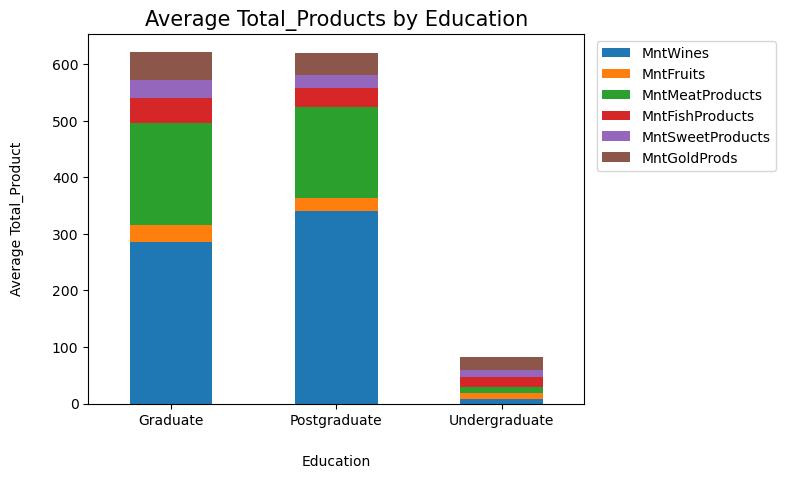

In [171]:
# Bar plot
education = df.groupby('Education')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

plt.figure(figsize=(50,50))
education.plot(kind='bar', stacked=True)
plt.title('Average Total_Products by Education', fontsize=15)
plt.xlabel('Education', fontsize=10, labelpad=20)
plt.ylabel('Average Total_Product', fontsize=10, labelpad=20);
plt.xticks(rotation=0, ha='center')
plt.legend(loc=1, bbox_to_anchor=(1.4, 1));

In [172]:
# DataFrame
df.groupby('Education')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Education,,,,,,
Graduate,285.276046,30.880677,180.122885,43.300980,31.477293,51.026714
Postgraduate,340.631031,22.358562,161.838221,32.643330,23.286660,37.906339
Undergraduate,7.240741,11.111111,11.444444,17.055556,12.111111,22.833333


In [173]:
df.groupby('Education')[['Total_Products']].mean()

,Total_Products
Education,
Graduate,622.084595
Postgraduate,618.664144
Undergraduate,81.796296


Berdasarkan dari informasi diatas, diketahui bahwa:
- Pelanggan yang berpendidikan Undergraduate memiliki proporsi jenis produk yang dibeli tidak jauh berbeda
- Pelanggan yang berpendidikan Undergraduate memiliki rata-rata jumlah produk yang paling rendah sebanyak 82, jauh berbeda dengan pelanggan yang berpendidikan Graduate dan Postgraduate
- Pelanggan yang berpendidikan Graduate dan Postgraduate rata-rata paling banyak membeli produk wine
- Pelanggan yang berpendidikan Graduate dan Postgraduate memiliki rata-rata jumlah produk yang tidak jauh berbeda. Oleh karena itu perlu dilakukan uji statistik menggunakan Mann-Whitney untuk menguji apakah ada perbedaan rata-rata antara dua variabel, yang diasumsikan data berdistribusi tidak normal


**INFERENTIAL STATISTICS: Mann-Whitney**

In [174]:
from scipy.stats import mannwhitneyu

Hypothesis
- Ho: Mean total pembelian produk oleh pelanggan yang berpendidikan sarjana (Graduate) = Mean total pembelian produk oleh pelanggan berpendidikan S2 (Post Graduate)
- Ha: Mean total pembelian produk oleh pelanggan yang berpendidikan sarjana (Graduate) != Mean total pembelian produk oleh pelanggan berpendidikan S2 (Post Graduate)

In [175]:
df.groupby('Education')[['Total_Products']].mean()

,Total_Products
Education,
Graduate,622.084595
Postgraduate,618.664144
Undergraduate,81.796296


In [176]:
stat, pvalue = mannwhitneyu(
    df[df['Education']=='Graduate']['Total_Products'],
    df[df['Education']=='Postgraduate']['Total_Products']
)

pvalue

0.934994132777779

In [177]:
# Kesimpulan

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Fail to reject Ho. 

    Kita TIDAK punya cukup bukti bahwa mean total pembelian produk oleh 
    pelanggan yang berpendidikan sarjana (Graduate) TIDAK SAMA DENGAN 
    mean total pembelian produk oleh pelanggan berpendidikan S2 (Post Graduate) 
    ''')
else:
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05. Reject Ho.
     
    Kita punya cukup bukti bahwa mean total pembelian produk oleh 
    pelanggan yang berpendidikan sarjana (Graduate) TIDAK SAMA DENGAN 
    mean total pembelian produk oleh pelanggan berpendidikan S2 (Post Graduate) 
    ''')


    pvalue = 0.934994132777779. pvalue > 0.05. Fail to reject Ho. 

    Kita TIDAK punya cukup bukti bahwa mean total pembelian produk oleh 
    pelanggan yang berpendidikan sarjana (Graduate) TIDAK SAMA DENGAN 
    mean total pembelian produk oleh pelanggan berpendidikan S2 (Post Graduate) 
    


Melihat Rata-rata Total_Products berdasarkan Marital Status menggunakan Barplot:

<Figure size 5000x5000 with 0 Axes>

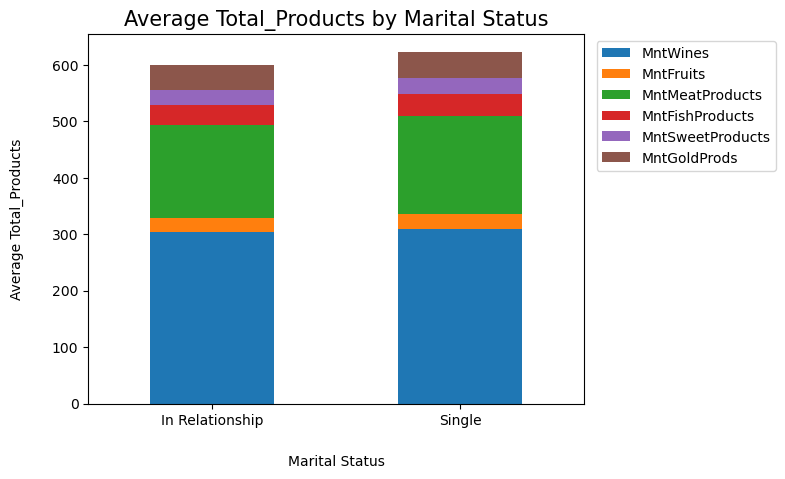

In [178]:
# Barplot
marital_status = df.groupby('Marital_Status')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

plt.figure(figsize=(50,50))
marital_status.plot(kind='bar', stacked=True)
plt.title('Average Total_Products by Marital Status', fontsize=15)
plt.xlabel('Marital Status', fontsize=10, labelpad=20)
plt.ylabel('Average Total_Products', fontsize=10, labelpad=20);
plt.xticks(rotation=0, ha='center')
plt.legend(loc=1, bbox_to_anchor=(1.4, 1));

In [179]:
# DataFrame
df.groupby('Marital_Status')[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Marital_Status,,,,,,
In Relationship,302.845354,25.615118,163.887656,36.880721,26.504161,42.950069
Single,308.207071,27.746212,173.779040,38.977273,28.280303,46.299242


In [180]:
df.groupby('Marital_Status')[['Total_Products']].mean()

,Total_Products
Marital_Status,
In Relationship,598.683079
Single,623.289141


Berdasarkan dari informasi diatas, diketahui bahwa:
- Pelanggan yang memiliki pasangan (In Relationship) dan pelanggan yang tidak memiliki pasangan (Single) memiliki proporsi jenis produk yang dibeli tidak jauh berbeda, dan paling banyak membeli jenis produk wine.
- Pelanggan yang memiliki pasangan (In Relationship) dan pelanggan yang tidak memiliki pasangan (Single) memiliki rata-rata jumlah produk yang tidak jauh berbeda. Oleh karena itu perlu dilakukan uji statistik menggunakan Mann-Whitney untuk menguji apakah ada perbedaan rata-rata antara dua variabel, yang diasumsikan data berdistribusi tidak normal


**INFERENTIAL STATISTICS: Mann-Whitney**

Hypothesis
- Ho: Mean total pembelian produk oleh pelanggan yang menjalin hubungan ('In Relationship') = Mean total pembelian produk olehpelanggan yang tidak menjalin hubungan ('Single')
- Ha: Mean total pembelian produk oleh pelanggan yang menjalin hubungan ('In Relationship') != Mean total pembelian produk oleh pelanggan yang tidak menjalin hubungan ('Single')

In [181]:
df.groupby('Marital_Status')[['Total_Products']].mean()

,Total_Products
Marital_Status,
In Relationship,598.683079
Single,623.289141


In [182]:
stat, pvalue = mannwhitneyu(
    df[df['Marital_Status']=='In Relationship']['Total_Products'],
    df[df['Marital_Status']=='Single']['Total_Products']
)

pvalue

0.47530504760238

In [183]:
# Kesimpulan

if pvalue > 0.05:
    print(f'''
    pvalue = {pvalue}. pvalue > 0.05. Fail to reject Ho. 

    Kita TIDAK punya cukup bukti bahwa mean total pembelian produk oleh 
    pelanggan yang hidup berpasangan (In Relationship) TIDAK SAMA DENGAN 
    mean total pembelian produk oleh pelanggan yang hidup sendiri (Single)
    ''')

else:
    print(f'''
    pvalue = {pvalue}. pvalue <= 0.05. Reject Ho.
     
    Kita punya cukup bukti bahwa mean total pembelian produk oleh 
    pelanggan yang hidup berpasangan (In Relationship) TIDAK SAMA DENGAN
    mean total pembelian produk oleh pelanggan yang hidup sendiri (Single)
    ''')


    pvalue = 0.47530504760238. pvalue > 0.05. Fail to reject Ho. 

    Kita TIDAK punya cukup bukti bahwa mean total pembelian produk oleh 
    pelanggan yang hidup berpasangan (In Relationship) TIDAK SAMA DENGAN 
    mean total pembelian produk oleh pelanggan yang hidup sendiri (Single)
    


---
## **CONCLUSION**

Berdasarkan dari hasil analisis data pelanggan perusahan tahun 2012-2014, maka dapat menjawab pertanyaan Tim Retail Market yaitu:

- Jumlah pelanggan yang mendaftar setiap bulannya tidak stabil. Bahkan dalam 6 bulan terakhir (Juli 2014-Desember 2014) jauh lebih sedikit dibandingkan jumlah pelanggan yang mendaftar pada bulan-bulan sebelumnya. Rata-rata pelanggan yang mendaftar pada bulan Juli 2014-Desember 2014 sebanyak 20 pelanggan, sedangkan Rata-rata pelanggan yang mendaftar pada bulan Januari 2014-Juni 2014 sebanyak 72 pelanggan.

- Sebanyak 99.06% pelanggan tidak pernah menyampaikan keluhan. Sehingga dapat disimpulkan bahwa pelanggan puas dengan produk, pelayanan dan fasilitas yang diberikan oleh perusahaan.

- Karakteristik pelanggan paling banyak berasal dari kelompok usia Middle Age Adult (Usia 40-59 tahun) sebesar 50.9%, berpendidikan Graduate (50.3%), memiliki pasangan (65.5%), memiliki satu anak (50.4%), pendapatan sebesar 40.000-59.999 (29.91%).

- Perilaku pelanggan paling banyak membeli wine (rata-rata sebanyak 305 atau sebesar 50.25%), melakukan pembelian melalui store (rata-rata sebanyak 6 kali atau sebesar 46.15%), dan menerima penawaran promosi pada campaign terakhir (sebanyak 334 atau sebesar 33.37%).

- Faktor yang memiliki hubungan yang kuat positif dengan jumlah pembelian produk adalah pendapatan (Income), jumlah pembelian yang dilakukan melalui catalog (NumCatalogPurchases), jumlah pembelian yang dilakukan melalui store (NumStorePurchases).

---
## **RECOMMENDATION**

Dalam menyusun strategi untuk satu tahun kedepan, Tim Retail Marketing perlu memperhatikan beberapa hal terkait dengan analisis di atas, yaitu:

- Untuk mempertahankan jumlah pelanggan sekaligus meningkatkan penjualan, Tim Retail perlu fokus kepada pelanggan yang loyal atau pelanggan yang paling banyak membeli produk.

- Untuk meningkatkan jumlah pelanggan, Tim Retail Market perlu meningkatkan iklan khususnya melalui media online. Pada era modern ini, setiap orang dapat mengakses media online dengan mudah, khususnya remaja (Teen). Karena jumlah pelanggan remaja masih rendah, solusi ini diharapkan dapat mampu meningkatkan jumlah pelanggan. Selain itu, sebaiknya memberikan penawaran khusus bagi pelanggan baru, agar menarik perhatian orang-orang untuk mendaftar dan juga berbelanja pada perusahaan ini.

- Untuk meningkatkan jumlah pembelian produk, Tim Retail Market bisa memberikan penawaran khusus kepada jenis produk yang kurang diminati seperti buah dan permen. Serta memastikan agar tim yang bertanggung jawab pada kualitas produk, dapat menjaga kualitas buah-buah, agar buah-buah yang dijual masih segar, sehingga pelanggan tertarik untuk membeli.

- Tim Desain perlu meningkatkan kualitas dari Web dan Catalog agar lebih menarik dan lebih mudah digunakan.